# ML Model to predict Stock price

Recurrent Neural Networks are the state of the art algorithm for sequential data and among others used by Apples Siri and Googles Voice Search. This is because it is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for Machine Learning problems that involve sequential data. It is one of the algorithms behind the scenes of the amazing achievements of Deep Learning in the past few years.

### Task 1 - Data pre-processing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
# pick only open price of stock
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [8]:
# Reshaping - Transform dataset into format required by RNN model "3D tensor with shape (batch_size, timesteps, input_dim)"
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### Task 2 - Building the RNN Model

In [9]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [10]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation (i.e drop in-active neurons)
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 20s 17ms/sample - loss: 0.0366
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0064
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0068
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0037
Epoch 12/100
1198/1198 [====

Epoch 95/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0014


In [12]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

### Task 3 - Making the predictions and visualising the results

In [13]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [14]:
# pick only open price of stock
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [15]:
# Append previous 60 days from training set to testing set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [16]:
# Creating a data structure with 60 timesteps and 1 output
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
# Getting the predicted stock price of 2017
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price

array([[0.911008  ],
       [0.905983  ],
       [0.9063232 ],
       [0.90867627],
       [0.91441804],
       [0.9246742 ],
       [0.9340681 ],
       [0.93789333],
       [0.9385597 ],
       [0.9382902 ],
       [0.9379998 ],
       [0.93760604],
       [0.93728834],
       [0.9382044 ],
       [0.9398726 ],
       [0.948018  ],
       [0.96016407],
       [0.9730901 ],
       [0.9800752 ],
       [0.97287226]], dtype=float32)

In [18]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[768.84143],
       [766.1402 ],
       [766.32306],
       [767.588  ],
       [770.67456],
       [776.18787],
       [781.2376 ],
       [783.29395],
       [783.65216],
       [783.50726],
       [783.3512 ],
       [783.1395 ],
       [782.96875],
       [783.4611 ],
       [784.3579 ],
       [788.7366 ],
       [795.26575],
       [802.21436],
       [805.96924],
       [802.09717]], dtype=float32)

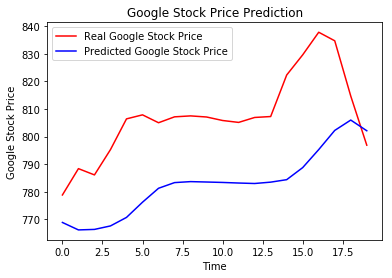

In [19]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()